In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cymr import models
from psifr import fr
from cfr import task
data_file = '/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv'
sem_file = '/Users/morton/PycharmProjects/cmr_cfr/data/cfr_wikiw2v.mat'
fit_dir = '/Users/morton/PycharmProjects/cmr_cfr/fits'
if not os.path.exists(fit_dir):
    os.makedirs(fit_dir)

In [2]:
import importlib
importlib.reload(task)
sim = task.read_similarity(sem_file)
raw = pd.read_csv(data_file)
mixed = raw.loc[raw['list_type'] == 'mixed']

FileNotFoundError: [Errno 2] File /Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv does not exist: '/Users/morton/PycharmProjects/cmr_cfr/data/MortEtal13.csv'

In [3]:
%%time
model = models.CMR()
fixed = {'B_rec': .8, 'Afc': 0, 'Dfc': 1, 'Acf': 0, 'Dcf': 1,
         'Lfc': 1, 'Lcf': 1, 'P1': 0, 'P2': 1,
         'T': 10, 'X1': .05, 'X2': 1}
var_bounds = {'B_enc': (0, 1), 'B_rec': (0, 1), 'Dfc': (0, 10), 'Acf': (0, 10), 'Dcf': (0, 10),
              'Lfc': (0, 10), 'Lcf': (0, 10), 'P1': (0, 10), 'P2': (0, 10),
              'X1': (0, 10), 'X2': (0, 10), 'T': (0, 2)}

var_names = ['B_enc', 'B_rec', 'Dfc', 'Acf', 'Dcf', 'Lfc', 'Lcf', 'P1', 'P2', 'X1', 'X2', 'T']
results = model.fit_indiv(mixed, fixed, var_names, var_bounds, n_jobs=4, method='de')

CPU times: user 495 ms, sys: 72.1 ms, total: 567 ms
Wall time: 7min 44s


In [4]:
print(results['logl'].sum())
results

-38690.100227185736


,B_rec,Afc,Dfc,Acf,Dcf,Lfc,Lcf,P1,P2,T,X1,X2,B_enc,logl
subject,,,,,,,,,,,,,,
1,0.706104,0.0,4.591694e+00,6.084015,7.822870,2.964409,1.829305,7.444525,3.486755,1.999996,0.007863,0.262239,0.810710,-901.204434
2,0.838563,0.0,3.909649e+00,7.483090,1.021017,5.580593,3.108929,9.814522,1.010386,1.664979,0.000956,0.409001,0.811809,-1019.894690
3,0.819341,0.0,9.019629e-04,2.343878,9.223506,0.000050,0.424831,9.926586,2.578896,0.673645,0.004913,0.307583,0.658962,-927.615790
4,0.688308,0.0,7.279906e+00,4.519604,7.694695,4.448413,2.430841,3.451349,4.804389,1.857747,0.009168,0.213275,0.738033,-963.833071
5,0.716904,0.0,4.937267e+00,3.061493,1.492433,8.303803,2.796377,3.884640,3.139061,1.483589,0.001089,0.315931,0.827653,-1219.689177
6,0.844426,0.0,8.069366e-01,3.694574,0.516925,7.326906,4.217093,6.827952,4.052961,1.999807,0.002704,0.337775,0.873309,-1007.922124
7,0.820824,0.0,5.284865e+00,7.605237,2.225912,7.454723,3.268389,3.636331,0.705270,1.998924,0.002218,0.302076,0.854431,-1141.526295
8,0.591071,0.0,8.340197e+00,2.706609,6.945856,4.051398,1.267898,1.375217,3.037933,1.744278,0.009314,0.311748,0.778294,-787.178571
10,0.833432,0.0,3.804214e+00,1.954675,0.000000,3.578390,3.867188,5.434860,2.314486,1.945043,0.005478,0.281379,0.587650,-961.145380


In [25]:
res_dir = os.path.join(fit_dir, 'test')
if not os.path.exists(res_dir):
    os.makedirs(res_dir)
time = datetime.now().isoformat(timespec='seconds')
results.to_csv(os.path.join(res_dir, f'param_{time}.csv'))

In [7]:
group_param = results.mean().to_dict()
just_param = results.drop(columns='logl')
subj_param = just_param.T.to_dict()
subj_param[1]

{'B_rec': 0.706103731021547,
 'Afc': 0.0,
 'Dfc': 4.591693821410153,
 'Acf': 6.084015354449072,
 'Dcf': 7.822870310890664,
 'Lfc': 2.9644089358511767,
 'Lcf': 1.8293050460370999,
 'P1': 7.444525252140841,
 'P2': 3.4867548780179924,
 'T': 1.9999961902762649,
 'X1': 0.007863072232261974,
 'X2': 0.26223941633835074,
 'B_enc': 0.8107099311157123}

In [8]:
model = models.CMR()
study_data = mixed.loc[(mixed['trial_type'] == 'study')]
recalls = model.generate(study_data, {}, subj_param)
study_keys = ['item_number', 'session', 'list_type', 'category', 
              'response', 'response_time', 'list_category']
sim = fr.merge_free_recall(recalls, study_keys=study_keys)
data = fr.merge_free_recall(mixed, study_keys=study_keys)
full = pd.concat([data, sim], keys=['data', 'sim'])
full.index.rename(names=['source', 'test'], inplace=True)

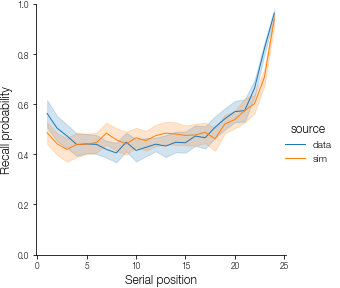

In [26]:
spc = full.groupby(['source']).apply(fr.spc)
g = fr.plot_spc(spc, hue='source', height=4);
g.add_legend();

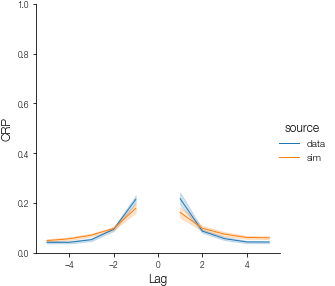

In [27]:
crp = full.groupby(['source']).apply(fr.lag_crp)
g = fr.plot_lag_crp(crp, hue='source', height=4);
g.add_legend();

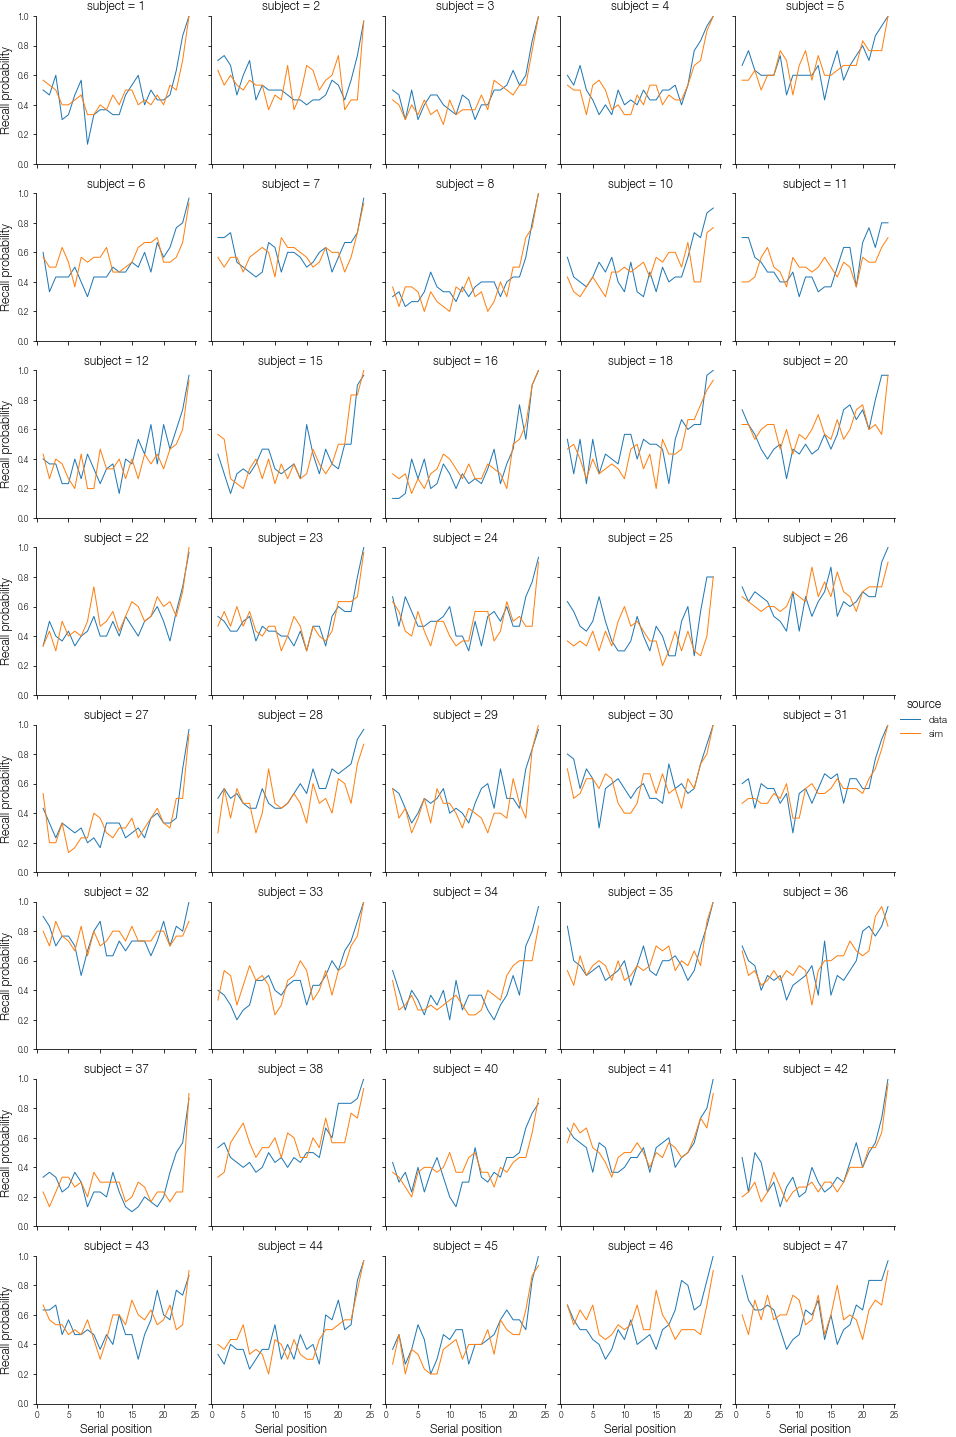

In [9]:
g = fr.plot_spc(spc, hue='source', col='subject', col_wrap=5, height=2.5);
g.add_legend();

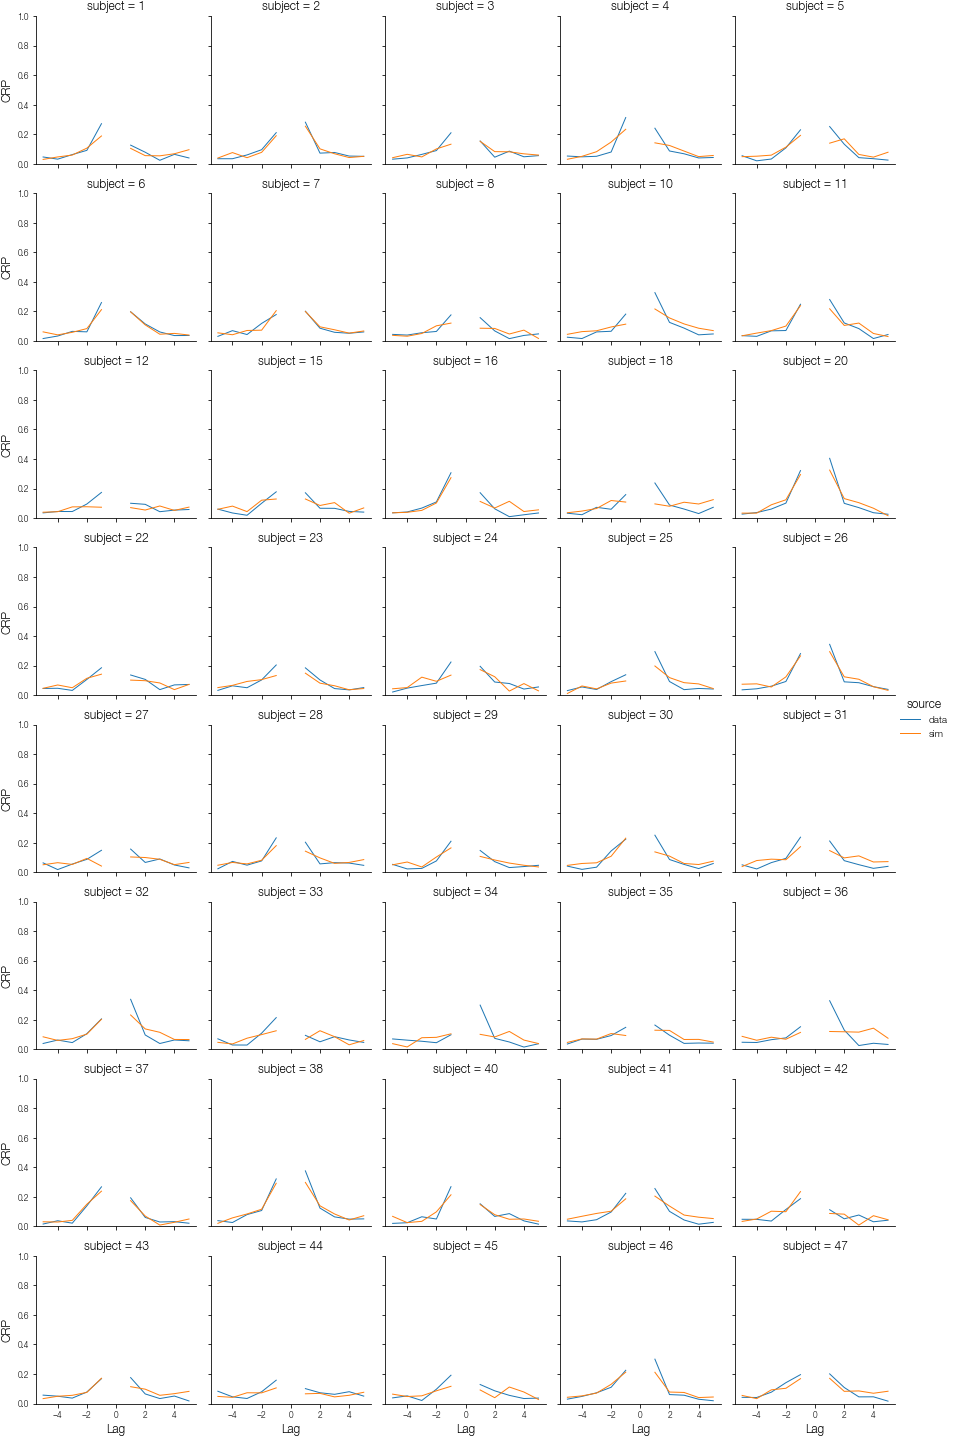

In [10]:
g = fr.plot_lag_crp(crp, hue='source', col='subject', col_wrap=5, height=2.5);
g.add_legend();